Avec pandas on peut charger ses propres données sur python les manipuler les nettoyer, analyser, méme assembler 2 datasets ...

**Analyse des données du titanic**

On a la dataset des passagers du titanic à disposition dans un excel avec des informations caractérisant les passagers

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #ça permet de charger la dataset dans python


In [4]:
!pip install xlrd  #installer le module xlrd pour la lecture de l'excel

ERROR: Invalid requirement: '#installer': Expected package name at the start of dependency specifier
    #installer
    ^


In [5]:
#ajouter un r devant le chemin du fichier, engine= xlrd si on est sur un fichier "xls"; engine= openpyxl si c'est un "xlsx"

pd.read_excel(r'C:\Users\LENOVO T480\Downloads\titanic3.xls', engine='xlrd') 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [6]:
#On enregistre le dataframe dans une variable data
data = pd.read_excel(r'C:\Users\LENOVO T480\Downloads\titanic3.xls', engine='xlrd')

In [7]:
data.shape #vérification des dimensions

(1309, 14)

In [9]:
data.info() #infos sur le nature des valeurs selon les colonnes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


1309 passagers et 14 caractéristiques qui sont en colonnes

In [248]:
data.columns #les fameuses cara

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [249]:
data.head() #les premières lignes de la data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Dans notre dataframe y a des cara qui sont inutiles comme le numéro de ticket on va les supprimer 

In [251]:
data = data.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'], axis=1, errors='ignore')
#axis=1 pour dire qu'on supprimer des colonnes

In [252]:
print(data.columns)

Index(['pclass', 'survived', 'sex', 'age'], dtype='object')


In [253]:
data

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1304,3,0,female,14.5000
1305,3,0,female,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


Là on n'a plus que 4 colonnes

In [255]:
#la fonction describe nous donne des statistiques de base pour chaque colonne
data.describe()

#pclass= passenger class économique,VIP... or some shit like that

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Moyenne d'age de 29 personne la plus jeune était un bébé de moins d'un an

38% des passagers ont survécu aussi 
1 t'as survécu 0 t'es mort donc la moyenne des 2  serait 0,5 donc 50% sont vivants 
d'où l'affirmation ci-dessus
dans count on a 1309 pour pclass et survived mais age on a 1046 cela veut dire que nous n'avons pas l'age de certains passagers. Il nous manque des données.
2 options: on peut remplacer les nan par la moyenne d'age avec datafillna sauf que bellek ils ont 10 ou 75 ans dans la réalité. solution 2 on élimine les lignes pour lesquelles on n'a pas l'info.De cette manière on n'altère pas la réalité.

In [258]:
data=data.dropna(axis=0) #on va supprimer des cas passagers donc des lignes


In [259]:
data.shape

(1046, 4)

In [260]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Nos stats ont donc changé là

Pour savoir combien de personnes étaient première classe 2e ou 3e on compte

<Axes: xlabel='pclass'>

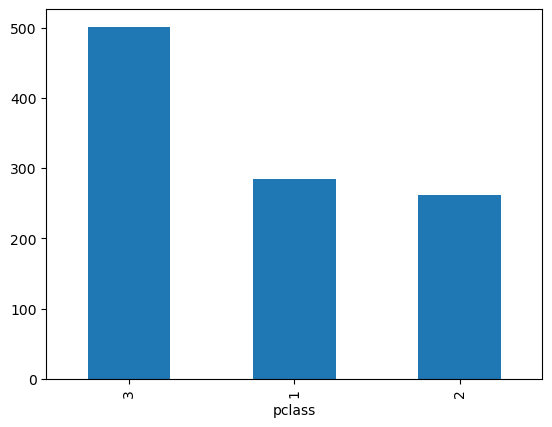

In [263]:
data['pclass'].value_counts().plot.bar()

<Axes: xlabel='pclass'>

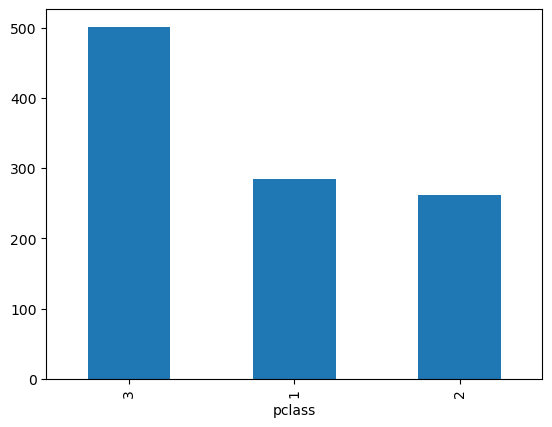

In [264]:
#Pandas utilise matplotlib.pyplot donc accès à plusieurs types de graphe

data['pclass'].value_counts().plot.bar()

<Axes: >

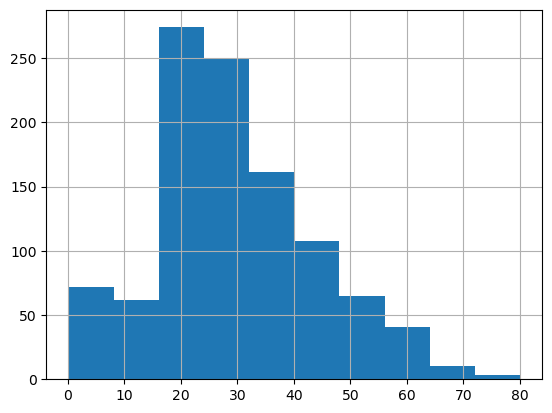

In [265]:
data['age'].hist()

On peut faire une analyse en regroupant les gens selon leur sexe par exemple grace à
groupby

In [267]:
data.groupby(['sex']).mean() 

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


75 % des femmes ont survécu pour seulement 20% des hommes age moyen 
chez femmes de 28 ans et 30 ans chez les h

In [269]:
data.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

Là on a une analyse qui regroupe selon le sexe et la classe donc on a par exemple
96 % des femme en 1 ont survécu et 35 pour les hommes

Dans Pandas, 2 structures de données: dataframes et series

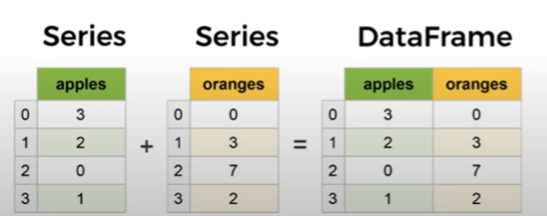

series c'est un tableau numpy à 1d à coté duquel on ajoute une colonne d'indexes qu'on peut choisir 

In [274]:
#Exemple
data=data.set_index('pclass')
data['age']

pclass
1    29.0000
1     0.9167
1     2.0000
1    30.0000
1    25.0000
      ...   
3    45.5000
3    14.5000
3    26.5000
3    27.0000
3    29.0000
Name: age, Length: 1046, dtype: float64

SI méme indexe on peut les mettre ensemble
pour avoir une dataframe comme sur l'image

dataframe c'est un dictionnaire(association clés et valeurs) qui contient des séries
ici c'est association de colonnes et séries

On aura des opérations d'indexing et de slicing dans pandas

In [278]:
data['age'] [0:10] # à gauche on a une série et à droite l'indexing

pclass
1    29.0000
1     0.9167
1     2.0000
1    30.0000
1    25.0000
1    48.0000
1    63.0000
1    39.0000
1    53.0000
1    71.0000
Name: age, dtype: float64

les 10 premiers élements de 0 à 10 (0 à 9 pour étre précis)

In [280]:
data['age'] < 18 #on met un masque

pclass
1    False
1     True
1     True
1    False
1    False
     ...  
3    False
3     True
3    False
3    False
3    False
Name: age, Length: 1046, dtype: bool

Il te dit si le passager est mineur ou pas 

In [283]:
data[data['age']<18] #on lilite notre dataset à la condition que les passagers soient mineurs 

,survived,sex,age
pclass,,,
1,1,male,0.9167
1,0,female,2.0000
1,0,male,17.0000
1,1,male,11.0000
1,1,female,14.0000
...,...,...,...
3,0,female,10.0000
3,0,male,16.0000
3,0,female,14.0000


Après avoir sélectionné que les passagers mineurs on peut utiliser groupby ou value counts pour se concentrer sur cette population

In [291]:
data[data['age'] < 18] ['survived'].value_counts()

survived
1    81
0    73
Name: count, dtype: int64

Là on peut savoir qui parmi les mineurs a survécu ou pas 

In [299]:
data[data['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

87% des mineurs en classe 1 ont survécu et la moyenne d'age des mineurs en classe 1 était de 14 ans

La fonction iloc signifie index localization c'est pour faire de l'indexing

In [304]:
data[0, 0] #on essaye l'indexing pour l'élement à la ligne 0 et à la colonne 0

KeyError: (0, 0)

Là on a de l'indexing comme sur numpy, sur pandas c'est pas exactement pareil

In [ ]:
data.iloc[0, 0] #avec iloc on est bon on peut vérifier en affichant data

In [ ]:
data_reset=data.reset_index() #à un moment du code j'ai remplacé les indices de ma dataframe par pclass là on réinitialise

In [ ]:
data.iloc[0:2,0:2] #S/O l'indice

In [ ]:
data_reset.loc[0:2,['age', 'sex']] #méme chose que iloc mais on travaille sur les colonnes

In [ ]:
data.index

In [ ]:
data_reset.index

2 dernières cellules pour expliciter l'histoire d'indices 

In [ ]:
data_reset['age']

In [ ]:
#Pour créer des catégories d'age 
def category_ages(age):
    if 'age' <= 20:
        return 'catégorie 0'
    elif 20 < 'age' <= 30:
        return 'Catégorie 1'
    elif 30 < 'age' <= 40:
        return 'Catégorie 2'
    else:
        return 'Catégorie 3'

In [ ]:
data_reset['sex'].astype('category').cat.codes

In [ ]:
data_reset['age'].value_counts()

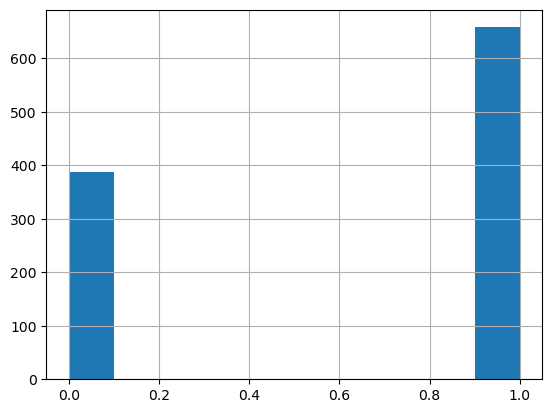

In [311]:
data_reset['sex'].astype('category').cat.codes.hist()
plt.show()

#Là ça montre pour le sexe pas l'age

In [314]:
data_reset.head()

,pclass,survived,sex,age
0,1,1,female,20-30 ans
1,1,1,male,<20 ans
2,1,0,female,<20 ans
3,1,0,male,20-30 ans
4,1,0,female,20-30 ans


In [316]:
data_reset['age'].value_counts()

age
20-30 ans    361
<20 ans      248
+40 ans      227
30-40 ans    210
Name: count, dtype: int64

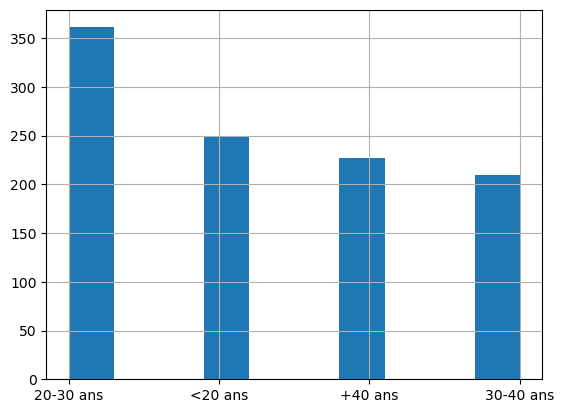

In [318]:
data_reset['age'].hist()
plt.show()

In [320]:
print(data_reset['age'].dtype)
print(data_reset['age'].head())

object
0    20-30 ans
1      <20 ans
2      <20 ans
3    20-30 ans
4    20-30 ans
Name: age, dtype: object


In [322]:
data_reset['age_category']=data_reset['age'].map(category_ages)

TypeError: '<=' not supported between instances of 'str' and 'int'